In [1]:
import re
import numpy as np
import pandas as pd
import math
import json
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#my_data = open("data200.json", "r")
data = pd.read_json (r'C:\Flatiron\course-material\ModuleOneFinalProject\dsc-mod-1-project-v2-1-onl01-dtsc-pt-030220\data_0423_0749PM_30pages_2010_2020.json')
df = df = pd.DataFrame(data)
# df.info()
print(df.shape)
#df.describe()
df[1465:1470]


(1500, 20)


,Title_id,Budget,Gross USA,Cumulative Worldwide Gross,Opening Weekend USA,Title,Year,Popularity,Genre,Runtime_min,Release_day,IMDB_Rate,Rating_count,Meta_Score,Director,Writer,Star,User_Review_Number,Critical_Review_Number,Meta_Rating
1465,tt1583420,30000000,35608245.0,75055070.0,13096065.0,Larry Crowne,2011,4045,"[Comedy, Drama, Romance]",98.0,07/01/2011,6.1,61302.0,41.0,[Tom Hanks],"[Tom Hanks, Nia Vardalos]","[Tom Hanks, Julia Roberts, Sarah Mahoney]",223.0,225.0,PG-13
1466,tt0479997,40000000,24827228.0,91627228.0,10612375.0,Season of the Witch,2011,4047,"[Action, Adventure, Fantasy]",95.0,01/07/2011,5.4,88316.0,NaN,[Dominic Sena],[Bragi F. Schut],"[Nicolas Cage, Ron Perlman, Claire Foy]",253.0,289.0,PG-13
1467,tt1085492,18000000,NaN,1289595.0,NaN,The Prince,2014,4048,"[Action, Thriller]",93.0,08/22/2014,4.6,16787.0,NaN,[Brian A. Miller],"[Andre Fabrizio, Jeremy Passmore]","[Jason Patric, Bruce Willis, John Cusack]",151.0,50.0,R
1468,tt3442006,7000000,1951776.0,2433850.0,916179.0,Cake,2014,4049,[Drama],102.0,01/23/2015,6.4,34339.0,49.0,[Daniel Barnz],[Patrick Tobin],"[Jennifer Aniston, Adriana Barraza, Anna Kendr...",167.0,166.0,R
1469,tt0770703,20000000,14011084.0,30426096.0,5421669.0,What's Your Number?,2011,4052,"[Comedy, Romance]",106.0,09/30/2011,6.1,70264.0,NaN,[Mark Mylod],"[Karyn Bosnak, Gabrielle Allan]","[Anna Faris, Chris Evans, Ari Graynor]",104.0,149.0,R


In [3]:
#print(df['Budget'])
#df.isna().sum()
# df[{'Title', 'Year'}][3000:3010]
#df.loc[df['Year'] == '2018']

#df = df.replace({'None': None})
#df.tail()

In [4]:
int_columns = ['Budget','Gross USA','Cumulative Worldwide Gross', 'Popularity',
               'Opening Weekend USA','Opening Weekend USA',
               'IMDB_Rate','Rating_count', 'Meta_Score','User_Review_Number',
              'Critical_Review_Number']
for column in int_columns:
    df[column] = pd.to_numeric(df[column],errors='coerce')

# df['Budget:'] = df['Budget:'].astype(int)
#type(df['Budget:'][0])
#df.info()



mean      5.859469e+07
median    3.500000e+07
std       5.986115e+07
Name: Budget, dtype: float64

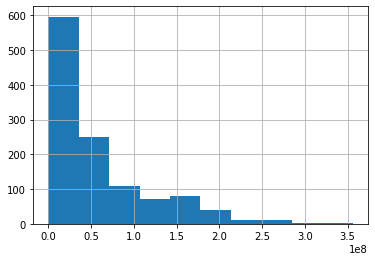

In [5]:
non_miss_Budegets = df['Budget'].loc[df['Budget'] > 0]
#print(non_miss_Budegets)
non_miss_Budegets.isna().sum()
display(non_miss_Budegets.apply(['mean', 'median', 'std']))
non_miss_Budegets.hist()

In [6]:
#df['Genre']
# All_Genres = []
# Title_id_New = []
# Budget_New = [] 
# Gross_New = []
# Worldwide_Gross_New = []
# Opening_Weekend_New = []
# df['Title_id']
# len(df['Genre'][0])

def creat_genre_df(col_name):

    Genres = []
    Title_id = []
    money = [] 
    for index, genres in enumerate(df['Genre']):
         if(isinstance(genres, list)):
            for genre in genres:
                Genres.append(genre)
                Title_id.append(df['Title_id'][index])
                money.append(df[col_name][index])
    #            print(Genres, Title_id, Genres)

    genres_dic = {'Title_id':Title_id, 'Genres': Genres}
    genres_dic[col_name] = money
    genres_df = pd.DataFrame(genres_dic)
    return genres_df

creat_genre_df('Budget')


,Title_id,Genres,Budget
0,tt8367814,Action,22000000.0
1,tt8367814,Comedy,22000000.0
2,tt8367814,Crime,22000000.0
3,tt7131622,Comedy,90000000.0
4,tt7131622,Drama,90000000.0
...,...,...,...
4837,tt1307068,Adventure,10000000.0
4838,tt1307068,Comedy,10000000.0
4839,tt1307068,Drama,10000000.0
4840,tt1307068,Romance,10000000.0


In [10]:
All_Genres = []
gener_mean = {}
for index, genres in enumerate(df['Genre']):
         if(isinstance(genres, list)):
            for genre in genres:
                All_Genres.append(genre)
unique_genres = set(All_Genres)
unique_genres
for genre in unique_genres:
    print(genre)
    gener_mean[genre] = creat_genre_df('Budget').loc[creat_genre_df('Budget')['Genres']== genre].mean()
   

Sport
Musical
History
Drama
News
Adventure
Biography
Comedy
Thriller
Music
Romance
Animation
Fantasy
Horror
Sci-Fi
Mystery
Action
Crime
Family
War
Western


In [11]:
unique_genres = set(All_Genres)
import collections
total_rows =len(All_Genres)
genre_country_list = collections.Counter(All_Genres)
#print(genre_country)

def one_genre_weight(movie_genre):
    All_Genres = []
    for index, genres in enumerate(df['Genre']):
             if(isinstance(genres, list)):
                for genre in genres:
                    All_Genres.append(genre)
    #print(All_Genres)
    genre_country = collections.Counter(All_Genres)
    weight = genre_country[movie_genre]/len(All_Genres)
    #print(weight)
    return weight
one_genre_weight('War')


0.011771995043370507

In [12]:
def all_genres_weight (genre_country_list):
    genres_weight = {}
    for genre in genre_country_list:
        genres_weight[genre] = one_genre_weight(genre)
    return genres_weight
all_genres_weight (genre_country_list)

{'Action': 0.10119785212722016,
 'Comedy': 0.10181743081371335,
 'Crime': 0.055762081784386616,
 'Drama': 0.16584056175134243,
 'Mystery': 0.04667492771581991,
 'Thriller': 0.1160677406030566,
 'War': 0.011771995043370507,
 'Romance': 0.053696819496076,
 'Adventure': 0.07971912432878976,
 'Fantasy': 0.046468401486988845,
 'Sci-Fi': 0.05245766212308963,
 'Family': 0.03139198678232136,
 'Horror': 0.045229244114002476,
 'Music': 0.008261049153242462,
 'Musical': 0.006815365551425031,
 'Biography': 0.03201156546881454,
 'Sport': 0.007021891780256092,
 'Animation': 0.016315572077653863,
 'History': 0.0161090458488228,
 'Western': 0.005163155720776538,
 'News': 0.00020652622883106156}

In [13]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df_out

In [14]:
def get_per_header_stat_df(df_name, column, group_by_column):
    new_df = remove_outlier(df_name, column)
    no_outlier_new_df = new_df.loc[new_df[column] > 0 ].groupby(group_by_column).agg({column: ['mean', 'median']})
    return no_outlier_new_df
a = get_per_header_stat_df(creat_genre_df('Budget'),'Budget', 'Genres')
# a['Budget']['mean']['Action']

#no_outlier_df(genres_df, 'Budget', 'Genres' ).head()
# genres_df.loc[genres_df['Gross_USA'] > 0 ].groupby('Genres').agg({'Gross_USA': ['mean', 'median',]})
#no_missing_Budeget.mean()

In [27]:
#creat_genre_df('Budget').loc[creat_genre_df('Budget')['Genres']=='Action'].mean()

#missing_df = df['Budget'].loc[df['Budget'].isna()]
# new_df = creat_genre_df('Budget')
# new_df.head()
genre_budget_df = creat_genre_df('Budget')
header_stat = get_per_header_stat_df(genre_budget_df,'Budget', 'Genres')
a = 0
calculated_all_genres_weight = all_genres_weight(genre_country_list)
for index, genres in enumerate(df['Genre']):
    if math.isnan(df['Budget'][index]) :
        a += 1
        weight_sum = 0
        weighted_mean = 0
        for movie_genre in genres:
            weight_sum = weight_sum +calculated_all_genres_weight[movie_genre]
            weighted_mean = weighted_mean + (header_stat['Budget']['mean'][movie_genre] *calculated_all_genres_weight[movie_genre])
#         print()
# print(df.iloc[0, df.columns.get_loc('Budget')])
# print(df.iloc[df['Budget'][0]])
# print(df['Budget'][0])

        df.iloc[index, df.columns.get_loc('Budget')] = weighted_mean / weight_sum
#         print(weighted_mean)
# print (a)
df.isna().sum()           
# for index, genres in enumerate(df['Genre']):
#     if math.isnan(df['Budget'][index]) :
#         for movie_genre in genres:
#             df.replace(df['Budget'][index], get_per_header_stat_df(creat_genre_df('Budget'),'Budget', 'Genres')['Budget']['mean'][movie_genre])

            
            
            
            #print (movie_genre)
            #creat_genre_df('Budget').loc[creat_genre_df('Budget')['Genres']=='Action'].mean()
            #movie_genre_mean = new_df.loc[new_df['Genres']== movie_genre].mean()
#             print(movie_genre_mean)
# #             weighted_mean = weighted_mean + one_genre_weight(movie_genre)*movie_genre_mean
#             df['Budget'][index] = weighted_mean
    #df['Budget'].loc[df['Budget'].isna()]['Budget'] = weighted_mean
#df.isna().sum()

Title_id                        0
Budget                          0
Gross USA                     241
Cumulative Worldwide Gross    137
Opening Weekend USA           254
Title                           7
Year                            0
Popularity                      0
Genre                           0
Runtime_min                    33
Release_day                     5
IMDB_Rate                       1
Rating_count                    1
Meta_Score                    895
Director                        0
Writer                          0
Star                            0
User_Review_Number              7
Critical_Review_Number          7
Meta_Rating                     0
dtype: int64

In [ ]:
#creat_genre_df('Budget').loc[creat_genre_df('Budget')['Genres']=='Action'].mean()

In [ ]:
# data_genres_df = pd.melt(genres_df, id_vars=['Genres'],value_vars=['Budget'],var_name='Gross')
# sns.boxplot(x='Genres',y='value',data=data_genres_df,hue='Gross')

In [ ]:
#genres_df.groupby('Genres').mean()

In [ ]:
# error_list = []
# for i, item in enumerate(df['Budget:']):
#     try:
#         int(item)
#     except ValueError:
#         #error_list.append('ERROR at index {}: {!r}'.format(i, item))
#         error_list.append(i)
# print(error_list)
# len(error_list)
#df = df.drop(error_list, axis=0)

In [ ]:
# curencys = [re.split(r'(\d+)', error) for error in error_list]
# print(curencys)
# curency_used = []
# for curency in curencys:
#     curency_used.append(curency[0])
# uniqe_currency = list(set(curency_used))
# uniqe_currency

In [ ]:
# df = df.replace({'None': None})
# df.head()
# count = 0
# for i, item in enumerate(df['Budget:']):
#     if item == 'None':
# #     if item is None:
#         count += 1
# print(count)

In [ ]:
# from scipy import stats
# z_scores = stats.zscore(genres_df)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df[filtered_entries]